In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import datetime as dt

from tools_fast import *
from hc_graph import *
sns.set()

<IPython.core.display.Javascript object>

Open console to check js libs were loaded in page


In [3]:
fund_name = 'HFRXGL'
pd.read_csv(r"financial_data/hfrx_index_names.csv", index_col=0)

,Full Name
Name,
HFRXAR,HFRX Absolute Return Index
HFRXDS,HFRX ED: Distressed Restructuring Index
HFRXMA,HFRX ED: Merger Arbitrage Index
HFRXSS,HFRX ED: Special Situations Index
HFRXEMN,HFRX EH: Equity Market Neutral Index
HFRXEHG,HFRX EH: Fundamental Growth Index
HFRXEHV,HFRX EH: Fundamental Value Index
HFRXEMC,HFRX Emerging Markets Composite Index
HFRXEW,HFRX Equal Weighted Strategies Index


### Financial data loads and cleaning

In [4]:
# US rate
US_rate = pd.read_csv(r"financial_data/USD_rates.csv", index_col=0, parse_dates=True, dayfirst=True)['3M']

# HFRX
hfrx_all = pd.read_csv(r"financial_data/hfrx_daily_index_data.csv", index_col=0, parse_dates=True, dayfirst=True)
hfrx = make_ER(hfrx_all[[fund_name]].dropna(), US_rate)

# BNP

bnp = pd.read_csv(r"financial_data/bnp_data_long_term.csv", index_col=0, parse_dates=True, dayfirst=True) #[["BNPIFEU","BNPIFUS",
                 #"BNPIFJP","BNPIFCN","BNPIFFR","BNPIFGE","BNPIFGB","BNPIFCH","BNPIFKR","BNPIFUSC","BNPIFBR",
                 #"BNPIFAU","BNPIFHK","BNPIFTW","BNPIFSG","BNPIFIT","BNPIFSP","BNPIFSW","BNPIFNE","BNPIFRU","BNPIFEM"]]
        
rand = pd.read_csv(r"financial_data/random_components.csv", index_col=0, parse_dates=True, dayfirst=True)

risk_premia = pd.read_pickle("financial_data/risk_premia_ER_FX_USD.pkl").ffill() #[["BNPICCE3","BNPIVMRU","BNPIAIRT","BNPIAIRU",
                  #"BNPIEC03","BNPIPLEE","BNPIPMEE","BNPIPQEE","BNPIPVEE","BNPILUEE","BNPIPMUH","BNPIPQUH",
                  #"BNPIPVUH","BNPIAIRG","BNPIAIRJ","BNPIAIRE"]]

In [5]:
df_info = pd.read_csv(r"financial_data/bnp_info.csv", index_col=0)
df_info.head()

,Asset Class,Style
Ticker,,
BNPIDRXA,Commodity,Carry
BNPIF3AX,Commodity,Carry
BNPIF3XM,Commodity,Momentum
BPFXSTGU,FX,Value
BNPICCE3,Equity,Carry


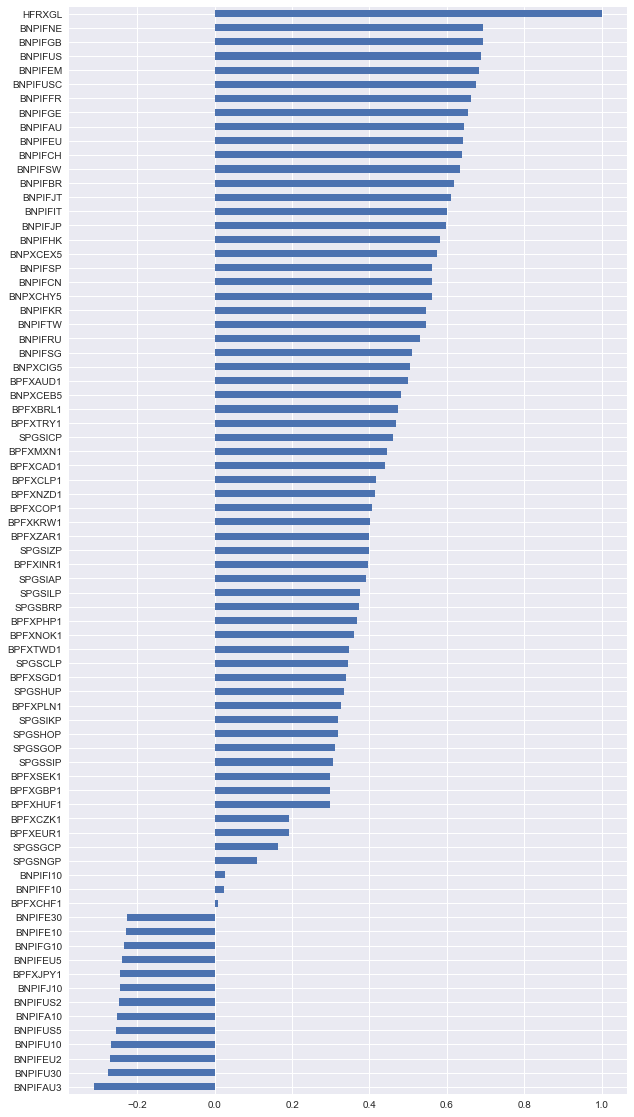

In [6]:
prices_all = hfrx.join(bnp,how="left")  # .join(risk_premia,how="left").ffill()
prices_all.resample('7D').first().pct_change().corr()[[fund_name]].sort_values(by=fund_name).plot(kind='barh', legend=None, figsize=(10,20))

In [7]:
prices_all.head()

,HFRXGL,BNPIFEU,BNPIFUS,BNPIFJP,BNPIFCN,BNPIFFR,BNPIFGE,BNPIFGB,BNPIFCH,BNPIFKR,...,SPGSICP,SPGSIZP,SPGSIKP,SPGSILP,SPGSGCP,SPGSSIP,BNPXCEB5,BNPXCEX5,BNPXCIG5,BNPXCHY5
2003-03-31,1.000000,119.746431,137.960807,55.002147,22.904581,97.681949,75.088460,85.874648,131.164048,105.5605,...,95.357454,43.522128,139.515794,41.6094,63.299109,65.584102,100.0,100.0,100.0,100.0
2003-04-01,1.001964,121.270258,139.983719,55.886297,22.952384,98.292425,75.692747,87.678180,132.780174,105.7853,...,96.095578,43.918258,140.071521,41.9123,62.979795,65.172835,100.0,100.0,100.0,100.0
2003-04-02,1.004159,127.035774,143.698758,56.353244,23.040957,102.304380,79.676099,89.466028,137.079115,107.0412,...,95.206783,43.607013,139.999863,41.5861,62.077814,64.658737,100.0,100.0,100.0,100.0
2003-04-03,1.004863,128.539724,142.655403,55.808539,22.909725,103.959571,80.267351,89.862012,138.848431,108.1501,...,94.393323,42.574536,139.820649,41.2832,61.194891,64.820312,100.0,100.0,100.0,100.0
2003-04-04,1.004746,130.361973,143.316375,56.487221,22.997248,105.782754,81.131912,90.727931,141.003673,110.5014,...,95.041063,43.055406,141.828308,40.8639,61.251200,64.849684,100.0,100.0,100.0,100.0


In [8]:
%%time
from clustering import cluster, cluster_net
C = prices_all.pct_change().corr(method='pearson')
names = np.array(list(C.columns))
n = len(names)
indices = np.arange(n, dtype=np.int32)
c_net = cluster_net(indices, C.values)
c_net.successive_merge(n-1, only_likelihood_improve=True)
i = 1
for cluster in c_net.clusters:
    print("Cluster",i,": \n", "Average correlation of {:.0%}".format(cluster.average_correl), "\n",
          df_info.loc[names[cluster.names]], "\n \n")
    i = i + 1

Total number of merges: 59
Cluster 1 : 
 Average correlation of 96% 
         Asset Class    Style
Ticker                      
BNPIFJP      Equity  Classic
BNPIFJT      Equity  Classic 
 

Cluster 2 : 
 Average correlation of 89% 
          Asset Class    Style
Ticker                       
BNPIFA10       Bonds  Classic
BNPIFAU3       Bonds  Classic 
 

Cluster 3 : 
 Average correlation of 89% 
         Asset Class    Style
Ticker                      
SPGSHUP   Commodity  Classic
SPGSHOP   Commodity  Classic
SPGSCLP   Commodity  Classic
SPGSBRP   Commodity  Classic 
 

Cluster 4 : 
 Average correlation of 85% 
          Asset Class    Style
Ticker                       
BNPIFUS2       Bonds  Classic
BNPIFUS5       Bonds  Classic 
 

Cluster 5 : 
 Average correlation of 83% 
          Asset Class    Style
Ticker                       
BNPIFU10       Bonds  Classic
BNPIFU30       Bonds  Classic 
 

Cluster 6 : 
 Average correlation of 80% 
         Asset Class    Style
Ticker          

c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  # This is added back by InteractiveShellApp.init_path()


In [9]:
returns_all = prices_all.pct_change().iloc[1:]
hrfx_returns = returns_all[[fund_name]]
returns_all = returns_all.drop(fund_name, axis=1)
prices_all = prices_all.drop(fund_name, axis=1).bfill()

In [10]:
alpha = hrfx_returns[fund_name].autocorr(lag=1)
hrfx_returns_adj = ((hrfx_returns - alpha * hrfx_returns.shift(1)) / (1. - alpha)).fillna(0) # 'liquidity adjustment' for
                                                                                             # removing returns autocorrelation
beta = hrfx_returns_adj[fund_name].autocorr(lag=1)

Auto-correlation of HFRXGL returns : 0.22217419834190766
Auto-correlation of HFRXGL adjusted returns : -0.00433525943474313


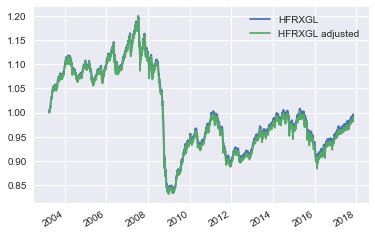

In [11]:
print("Auto-correlation of",fund_name,"returns :", alpha)
print("Auto-correlation of",fund_name,"adjusted returns :", beta)
ax = (1 + hrfx_returns).cumprod().plot()
_ = (1 + hrfx_returns_adj).cumprod()[fund_name].plot(label=fund_name + ' adjusted', legend=True, ax=ax)

## Estimation of the exposures

In [12]:
size = 126
freq = 5
tau = 0.1
freq_ml = 20

In [13]:
%%time
df_weight_ols = ridge_regression(hrfx_returns, returns_all,sample_length=size, frequency=freq, l=1e-10)
prices_for_track_ols = prices_all.loc[df_weight_ols.index[0]:]

Wall time: 15.7 s


In [14]:
%time
df_weight_ridge = ridge_regression(hrfx_returns, returns_all,sample_length=size, frequency=freq, l=1e-2)

prices_for_track_ridge = prices_all.loc[df_weight_ridge.index[0]:]

Wall time: 0 ns


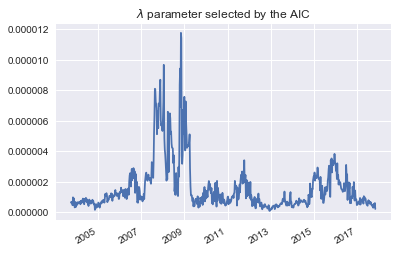

Wall time: 28.7 s


In [15]:
%%time
df_weight_aic, _ = lasso_regression_ic(hrfx_returns, returns_all,sample_length=size, frequency=freq, criterion='aic')

prices_for_track_aic = prices_all.loc[df_weight_aic.index[0]:]

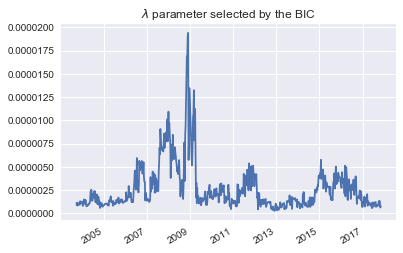

Wall time: 26.6 s


In [16]:
%%time
df_weight_bic, _ = lasso_regression_ic(hrfx_returns, returns_all,sample_length=size, frequency=freq, criterion='bic')

prices_for_track_bic = prices_all.loc[df_weight_bic.index[0]:]

In [17]:
%%time
nu = 0.5
df_weight_kalman = kalman_filter(hrfx_returns, returns_all,freq, sigma_weight=1. , sigma_return=nu)

prices_for_track_kalman = prices_all.loc[df_weight_kalman.index[0]:]

Wall time: 257 ms


In [18]:
%%time
df_weight_ml_kalman, _ = ml_kalman_filter(hrfx_returns, returns_all, freq_ml, tau=tau)

Wall time: 13.5 s


In [19]:
%%time
df_weight_kalman_bic = selective_kalman_filter(hrfx_returns, returns_all,sample_length=size, frequency=freq,
                                               nu=nu, criterion='bic')

prices_for_track_kalman_bic = prices_all.loc[df_weight_kalman_bic.index[0]:]

Wall time: 26 s


In [20]:
%%time
df_weight_ml_kalman_bic = ml_selective_kalman_filter(hrfx_returns, returns_all,sample_length=size, frequency=freq_ml,
                                                     tau=tau, criterion='bic')

prices_for_track_ml_kalman_bic = prices_all.loc[df_weight_ml_kalman_bic.index[0]:]

Wall time: 18.1 s


In [21]:
%%time
df_weight_kalman_aic = selective_kalman_filter(hrfx_returns, returns_all,sample_length=size, frequency=freq,
                                               nu=nu, criterion='aic')

prices_for_track_kalman_aic = prices_all.loc[df_weight_kalman_aic.index[0]:]

Wall time: 26 s


In [22]:
%%time
df_weight_ml_kalman_aic = ml_selective_kalman_filter(hrfx_returns, returns_all,sample_length=size, frequency=freq_ml,
                                                     tau=tau, criterion='aic')

prices_for_track_ml_kalman_aic = prices_all.loc[df_weight_ml_kalman_aic.index[0]:]

Wall time: 13.3 s


## Replication

In [23]:
%%time
tc = 0.0005
lag = 2

replication_ols = make_track(prices_for_track_ols, df_weight_ols, tc=tc, lag=lag)
df_res = hfrx.loc[replication_ols.index]
df_res["OLS"] = replication_ols

replication_ridge = make_track(prices_for_track_ridge, df_weight_ridge, tc=tc, lag=lag)
df_res["Ridge"] = replication_ridge

replication_aic = make_track(prices_for_track_aic, df_weight_aic, tc=tc, lag=lag)
df_res["Lasso AIC"] = replication_aic

replication_aic = make_track(prices_for_track_aic, df_weight_aic, tc=tc, lag=lag)
df_res["Lasso AIC"] = replication_aic

replication_bic = make_track(prices_for_track_bic, df_weight_bic, tc=tc, lag=lag)
df_res["Lasso BIC"] = replication_bic

replication_kalman = make_track(prices_for_track_kalman, df_weight_kalman, tc=tc, lag=lag).loc[df_res.index[0]:]
df_res["Kalman"] = replication_kalman

replication_ml_kalman = make_track(prices_for_track_kalman, df_weight_ml_kalman, tc=tc, lag=lag).loc[df_res.index[0]:]
df_res["ML Kalman"] = replication_ml_kalman

replication_kalman_aic = make_track(prices_for_track_kalman_aic, df_weight_kalman_aic, tc=tc, lag=lag).loc[df_res.index[0]:]
df_res["Kalman AIC"] = replication_kalman_aic

replication_ml_kalman_aic = make_track(prices_for_track_ml_kalman_aic, df_weight_ml_kalman_aic, tc=tc, lag=lag).loc[df_res.index[0]:]
df_res["ML Kalman AIC"] = replication_ml_kalman_aic

replication_kalman_bic = make_track(prices_for_track_kalman_bic, df_weight_kalman_bic, tc=tc, lag=lag).loc[df_res.index[0]:]
df_res["Kalman BIC"] = replication_kalman_bic

replication_ml_kalman_bic = make_track(prices_for_track_ml_kalman_bic, df_weight_ml_kalman_bic, tc=tc, lag=lag).loc[df_res.index[0]:]
df_res["ML Kalman BIC"] = replication_ml_kalman_bic

Wall time: 143 ms


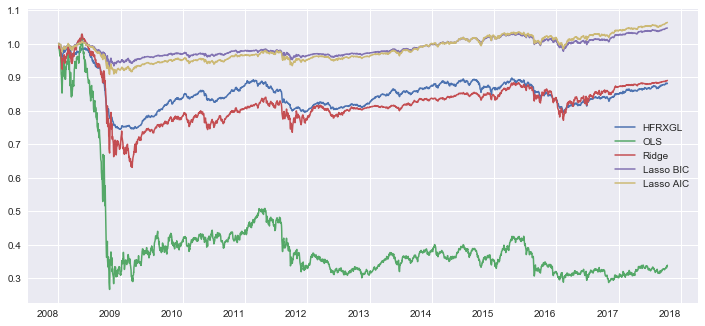

In [67]:
df_res = df_res.loc['2008':'2017-10-13']  #.loc['06-2009':]
df_res = (df_res / df_res.iloc[0])
df_res[[fund_name, 'OLS', 'Ridge', 'Lasso BIC', 'Lasso AIC']].plot(figsize=(12,6), rot=0, linewidth=1.5)

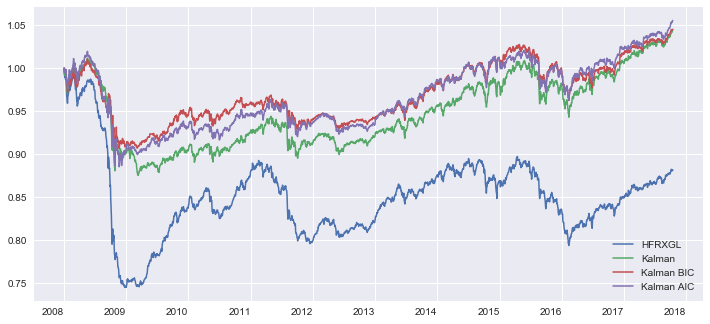

In [68]:
df_res[[fund_name, 'Kalman', 'Kalman BIC', 'Kalman AIC']].plot(figsize=(12,6), rot=0, linewidth=1.5)

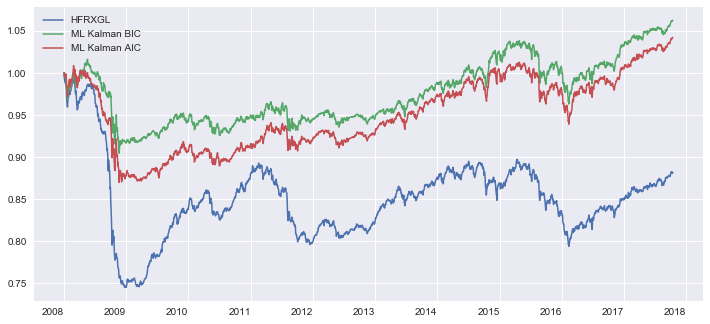

In [69]:
df_res[[fund_name, "ML Kalman BIC", "ML Kalman AIC"]].plot(figsize=(12,6), rot=0, linewidth=1.5)

In [27]:
df_stat = replication_stats(df_res, fund_name=fund_name)
df_stat

,Correlation,Kendall tau,Tracking error,R-squared,Sharpe ratio,Annual Return,Maximum Drawdown
HFRXGL,1.000000,1.000000,0.000000,1.000000,-0.254673,-0.012693,-0.254931
OLS,0.703290,0.485496,0.240027,-26.157665,-0.267428,-0.104635,-0.714421
Ridge,0.694935,0.561092,0.069698,-1.289872,-0.080159,-0.011802,-0.369188
Lasso AIC,0.825842,0.631927,0.027492,0.643727,0.230153,0.006266,-0.087792
Lasso BIC,0.796991,0.618676,0.030938,0.548802,0.212800,0.004664,-0.066287
Kalman,0.823863,0.631912,0.026108,0.678694,0.135978,0.004405,-0.131674
ML Kalman,0.777466,0.602450,0.029135,0.599868,0.145304,0.004899,-0.129886
Kalman AIC,0.827835,0.641034,0.026069,0.679663,0.175076,0.005472,-0.119456
ML Kalman AIC,0.805137,0.627983,0.027318,0.648227,0.131881,0.004182,-0.135499
Kalman BIC,0.805855,0.631326,0.027560,0.641957,0.152076,0.004492,-0.098362


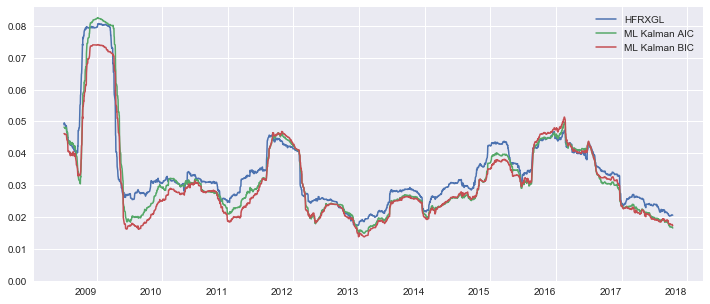

In [65]:
vol = np.sqrt(252) * df_res.pct_change().rolling(window=126).std().dropna()
vol[[fund_name, 'ML Kalman AIC', 'ML Kalman BIC']].plot(ylim=(0,None), figsize=(12,5.6), linewidth=1.5, rot=0)

### Volatility adjustment

In [29]:
%%time
vol_period = 20
df_weight_kalman_aic_voladj = selective_kalman_filter(hrfx_returns, returns_all,sample_length=size, frequency=freq,\
                                          nu=nu, criterion='aic', vol_target=True, vol_period=vol_period)
df_weight_kalman_bic_voladj = selective_kalman_filter(hrfx_returns, returns_all,sample_length=size, frequency=freq,\
                                          nu=nu, criterion='bic', vol_target=True, vol_period=vol_period)
df_weight_ml_kalman_bic_voladj = ml_selective_kalman_filter(hrfx_returns, returns_all,sample_length=size, frequency=freq_ml,
                                                     tau=tau, criterion='bic', vol_target=True, vol_period=vol_period)
df_weight_ml_kalman_aic_voladj = ml_selective_kalman_filter(hrfx_returns, returns_all,sample_length=size, frequency=freq_ml,
                                                     tau=tau, criterion='aic', vol_target=True, vol_period=vol_period)
df_weight_kalman_voladj = kalman_filter(hrfx_returns, returns_all,freq, sigma_weight=1. , sigma_return=nu,
                                        vol_target=True, vol_period=size)
df_weight_ml_kalman_voladj, _ = ml_kalman_filter(hrfx_returns, returns_all,freq, tau=tau, vol_target=True, vol_period=size)

prices_for_track = prices_all.loc[df_weight_kalman_voladj.index[0]:]

replication_kalman_voladj = make_track(prices_for_track, df_weight_kalman_voladj, tc=tc, lag=lag)
df_res_voladj = hfrx.loc[replication_kalman_voladj.index]
df_res_voladj["Kalman VT"] = replication_kalman_voladj

replication_ml_kalman_voladj = make_track(prices_for_track, df_weight_ml_kalman_voladj, tc=tc, lag=lag)
df_res_voladj["ML Kalman VT"] = replication_ml_kalman_voladj

prices_for_track = prices_all.loc[df_weight_kalman_aic_voladj.index[0]:]

replication_kalman_aic_voladj = make_track(prices_for_track, df_weight_kalman_aic_voladj, tc=tc, lag=lag)
df_res_voladj["Kalman AIC VT"] = replication_kalman_aic_voladj

replication_ml_kalman_aic_voladj = make_track(prices_for_track, df_weight_ml_kalman_aic_voladj, tc=tc, lag=lag)
df_res_voladj["ML Kalman AIC VT"] = replication_ml_kalman_aic_voladj

replication_kalman_bic_voladj = make_track(prices_for_track, df_weight_kalman_bic_voladj, tc=tc, lag=lag)
df_res_voladj["Kalman BIC VT"] = replication_kalman_bic_voladj

replication_ml_kalman_bic_voladj = make_track(prices_for_track, df_weight_ml_kalman_bic_voladj, tc=tc, lag=lag)
df_res_voladj["ML Kalman BIC VT"] = replication_ml_kalman_bic_voladj

Wall time: 1min 24s


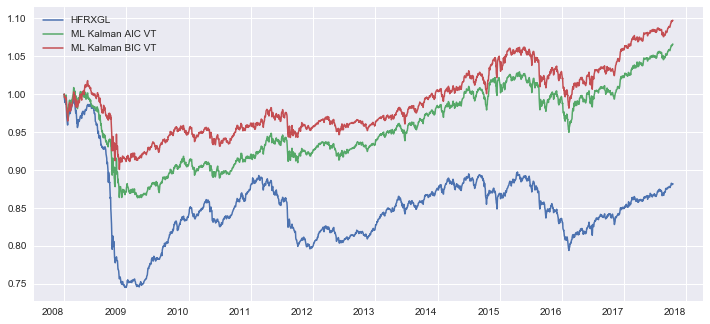

In [70]:
df_res_voladj = df_res_voladj.loc['2008':'2017-10-13'].dropna()
df_res_voladj = (df_res_voladj / df_res_voladj.iloc[0])
df_res_voladj[[fund_name, 'ML Kalman AIC VT', 'ML Kalman BIC VT']].plot(figsize=(12,6), rot=0, linewidth=1.5)

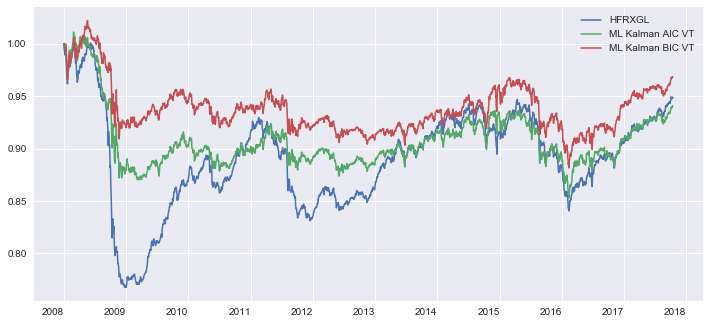

In [71]:
df_res_volperfadj = df_res_voladj[[fund_name]].copy()
temp = df_res_voladj.drop(fund_name, axis=1)
df_res_volperfadj[temp.columns]= make_ER(temp, 2 + 0 * US_rate)
df_res_volperfadj = make_ER(df_res_volperfadj, - US_rate)
df_res_volperfadj[[fund_name, 'ML Kalman AIC VT', 'ML Kalman BIC VT']].plot(figsize=(12,6), rot=0, linewidth=1.5)

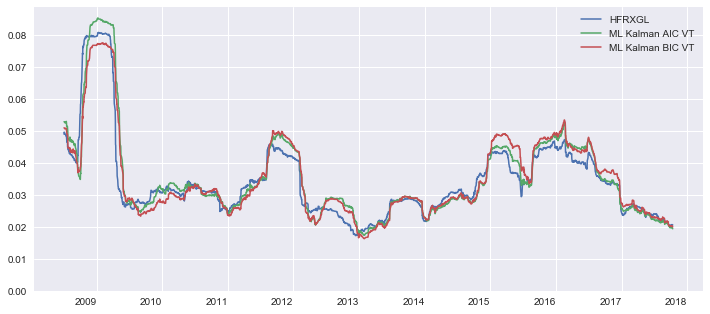

In [64]:
vol = np.sqrt(252) * df_res_voladj.pct_change().rolling(window=126).std().dropna()
vol[[fund_name, 'ML Kalman AIC VT', 'ML Kalman BIC VT']].plot(ylim=(0,None), figsize=(12,5.8), linewidth=1.5, rot=0)

## Statistics on replication

In [33]:
df_stat_vol = replication_stats(df_res_voladj, fund_name=fund_name)
df_stat_vol

,Correlation,Kendall tau,Tracking error,R-squared,Sharpe ratio,Annual Return,Maximum Drawdown
HFRXGL,1.000000,1.000000,0.000000,1.000000,-0.254673,-0.012693,-0.254931
Kalman VT,0.780621,0.619908,0.030004,0.575636,0.144277,0.005422,-0.168658
ML Kalman VT,0.725965,0.554251,0.033491,0.471293,-0.081742,-0.004587,-0.187775
Kalman AIC VT,0.825379,0.641666,0.026015,0.680986,0.090138,0.002740,-0.122169
ML Kalman AIC VT,0.807312,0.628676,0.027331,0.647894,0.182050,0.006494,-0.143348
Kalman BIC VT,0.804011,0.626673,0.027399,0.646128,0.223435,0.007752,-0.101924
ML Kalman BIC VT,0.806238,0.626118,0.027279,0.649220,0.265659,0.009497,-0.102122


## Volatility contributions

In [34]:
df_vol_contrib_kalman_bic_voladj = (prices_all.reindex(df_weight_ml_kalman_bic_voladj.index).pct_change()*df_weight_ml_kalman_bic_voladj).std()
df_vol_contrib_kalman_bic_voladj = df_vol_contrib_kalman_bic_voladj/df_vol_contrib_kalman_bic_voladj.sum()

df_vol_contrib_kalman_aic_voladj = (prices_all.reindex(df_weight_ml_kalman_aic_voladj.index).pct_change()*df_weight_ml_kalman_aic_voladj).std()
df_vol_contrib_kalman_aic_voladj = df_vol_contrib_kalman_aic_voladj/df_vol_contrib_kalman_aic_voladj.sum()

In [35]:
df_vol_contrib = pd.DataFrame()
df_vol_contrib["ML Kalman AIC VT"] = df_vol_contrib_kalman_aic_voladj
df_vol_contrib["ML Kalman BIC VT"] = df_vol_contrib_kalman_bic_voladj
df_vol_contrib = df_vol_contrib.join(df_info).reset_index()

In [36]:
df_vol_contrib_asset_class = df_vol_contrib.drop(["Style"],axis=1).groupby(["Asset Class","index"]).sum()
df_vol_contrib_style = df_vol_contrib.drop(["Asset Class"],axis=1).groupby(["Style","index"]).sum()

In [37]:
g = hc_spiderweb(df_vol_contrib_asset_class, title="Vol contribution by Asset Class")
g.plot()

In [38]:
g = hc_spiderweb(df_vol_contrib_style, title="Vol contribution by Style")
g.plot()

In [39]:
g = hc_piechart(df_vol_contrib_asset_class[["ML Kalman BIC VT"]], title="Vol contribution by Asset Class in ML Kalman BIC VT")
g.plot()

In [40]:
g = hc_piechart(df_vol_contrib_style[["ML Kalman BIC VT"]], title="Vol contribution by Style in Kalman BIC")
g.plot()

## Performance contributions

In [41]:
df_perf_contrib_kalman_bic_voladj = (1 + prices_all.reindex(df_weight_ml_kalman_bic_voladj.index).pct_change()*df_weight_ml_kalman_bic_voladj).prod() - 1

df_perf_contrib_kalman_aic_voladj = (1 + prices_all.reindex(df_weight_ml_kalman_aic_voladj.index).pct_change()*df_weight_ml_kalman_aic_voladj).prod() - 1

In [42]:
df_perf_contrib = pd.DataFrame()
df_perf_contrib["ML Kalman AIC VT"] = df_perf_contrib_kalman_aic_voladj
df_perf_contrib["ML Kalman BIC VT"] = df_perf_contrib_kalman_bic_voladj
df_perf_contrib = df_perf_contrib.join(df_info).reset_index()

In [43]:
df_perf_contrib_asset_class = df_perf_contrib.drop(["Style"],axis=1).groupby(["Asset Class","index"]).sum()
df_perf_contrib_style = df_perf_contrib.drop(["Asset Class"],axis=1).groupby(["Style","index"]).sum()

In [44]:
g = hc_spiderweb(df_perf_contrib_asset_class, title="Vol contribution by Asset Class")
g.plot()

In [45]:
g = hc_spiderweb(df_perf_contrib_style, title="Vol contribution by Style")
g.plot()

## Average exposures

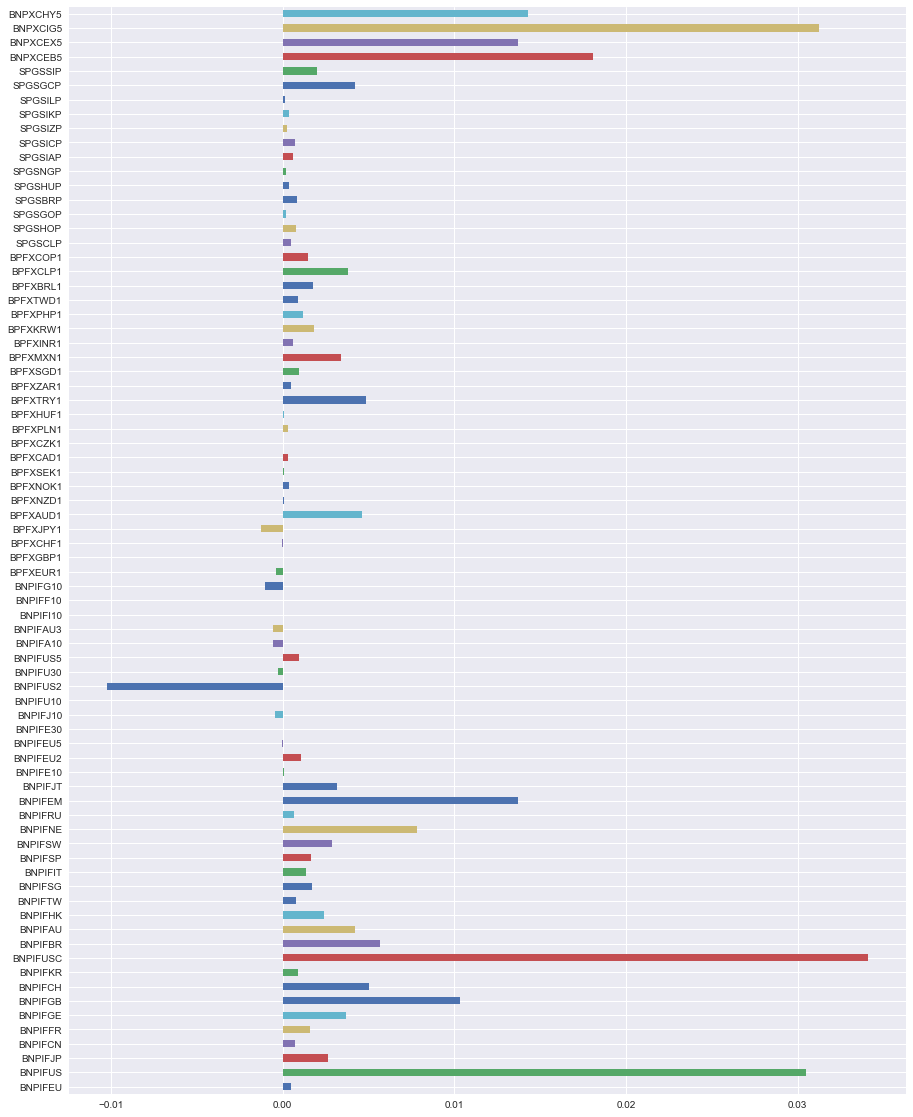

In [46]:
(df_weight_aic).mean(axis=0).plot(kind='barh', figsize=(15,20))

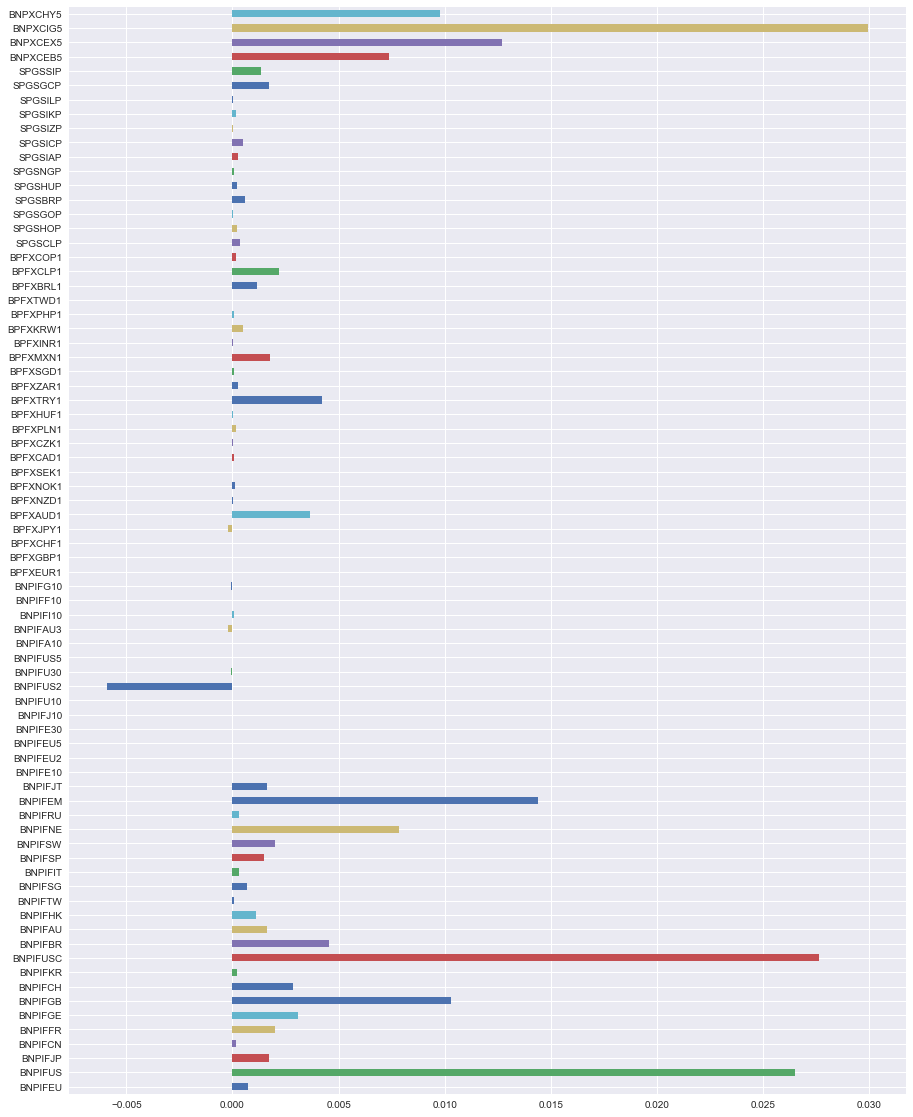

In [47]:
(df_weight_bic).mean(axis=0).plot(kind='barh', figsize=(15,20))

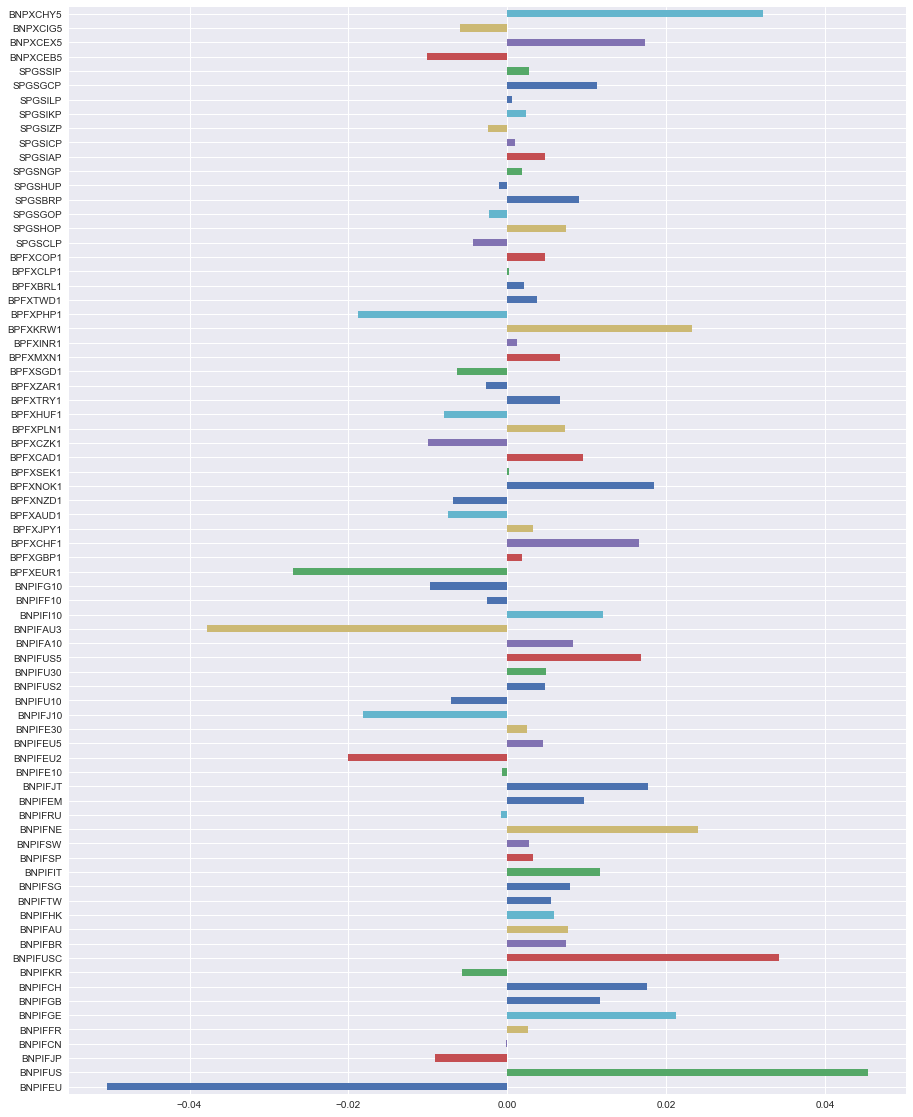

In [48]:
df_weight_kalman.loc[df_res.index[0]:].mean(axis=0).plot(kind='barh', figsize=(15,20))

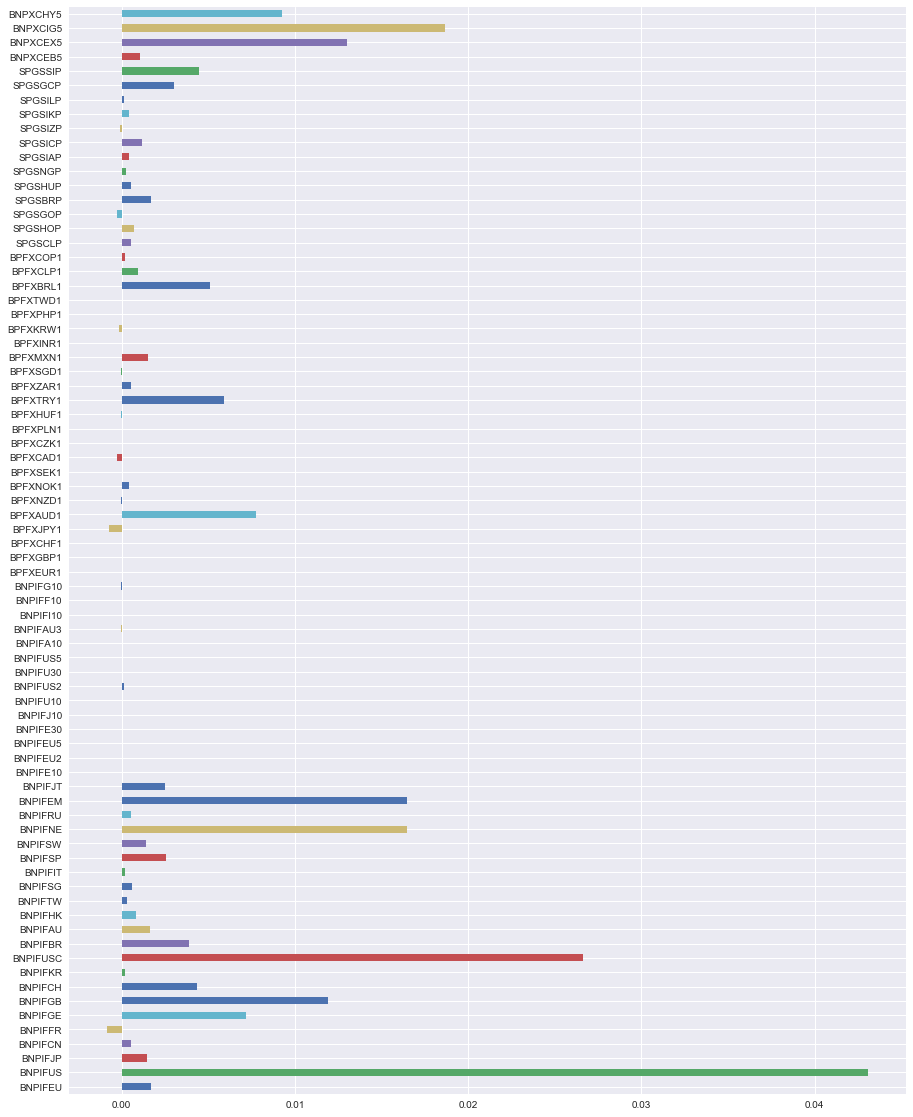

In [49]:
df_weight_kalman_bic.loc[df_res.index[0]:].mean(axis=0).plot(kind='barh', figsize=(15,20))

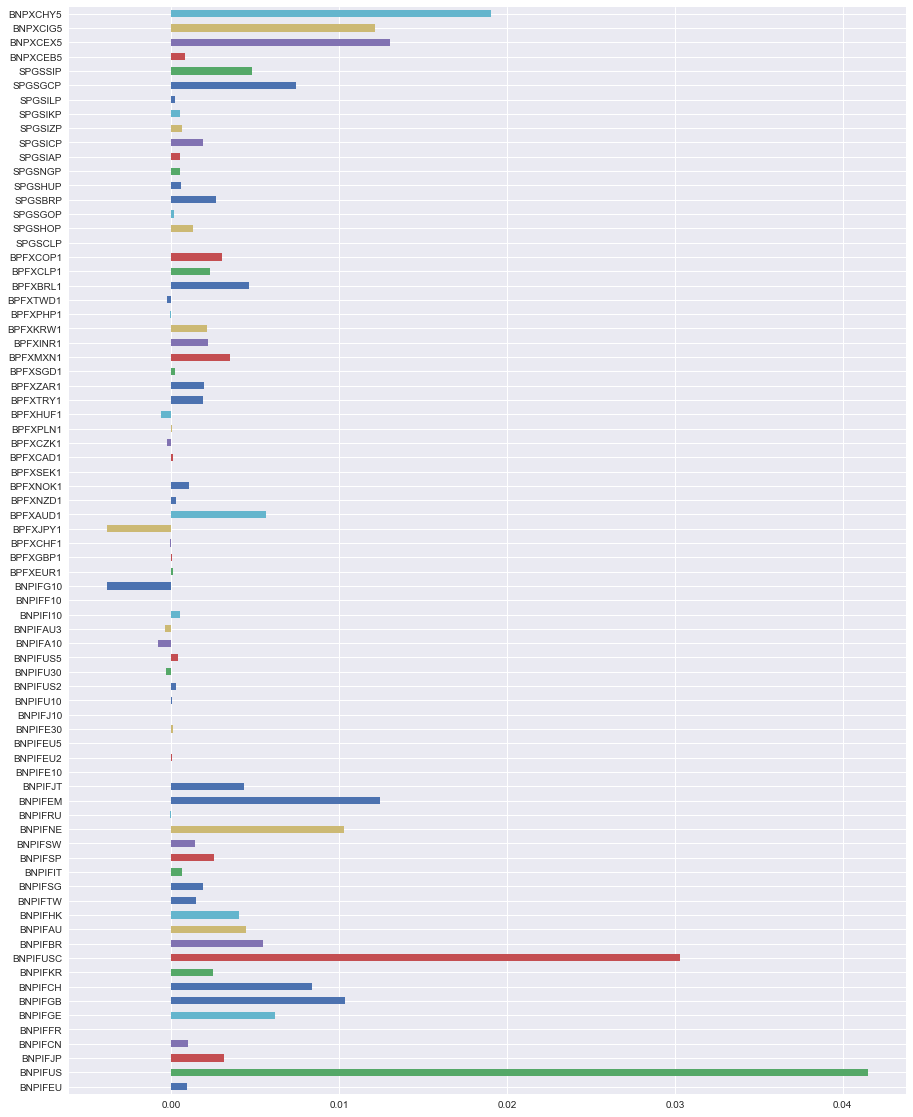

In [50]:
df_weight_kalman_aic.loc[df_res.index[0]:].mean(axis=0).plot(kind='barh', figsize=(15,20))

In [51]:
limit = 60
df_autocorr = pd.DataFrame(data=[df_res.drop(["Lasso AIC","Lasso BIC"],axis=1)\
                                 .pct_change().apply(lambda col : col.autocorr(lag=i)) for i in range(1,limit)])
df_autocorr[r"$2/\sqrt{n}$"] = [2/np.sqrt(len(df_res)-i) for i in range(1,limit)]
df_autocorr[r"$-2/\sqrt{n}$"] = [-2/np.sqrt(len(df_res)-i) for i in range(1,limit)]

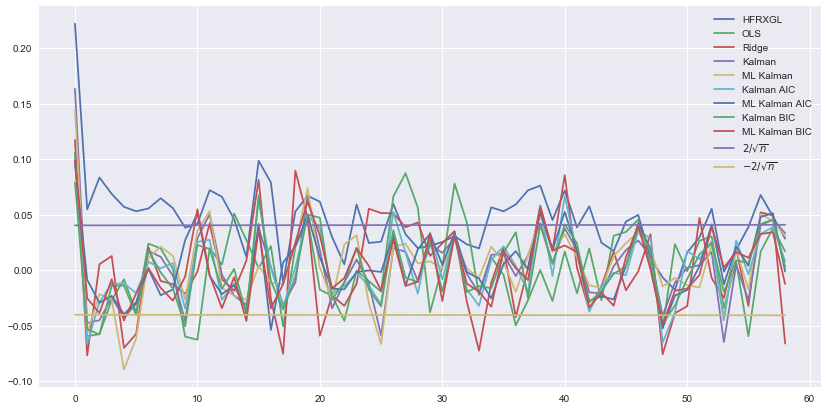

In [52]:
df_autocorr.plot(figsize=(14,7))

In [53]:
df_res[fund_name].pct_change().autocorr(lag=1)

0.22206876352167623

In [54]:
df_res['Kalman'].pct_change().autocorr(lag=1)

0.16325162775706945

In [55]:
df_res['Kalman BIC'].pct_change().autocorr(lag=1)

0.07894932888087206

In [56]:
df_res['Kalman AIC'].pct_change().autocorr(lag=1)

0.10059887495015599

In [57]:
df_res['Lasso AIC'].pct_change().autocorr(lag=1)

0.10750936878360366